In [1]:
from sklearn.datasets import make_circles

In [27]:
x, y = make_circles(noise = 0.2, factor=0.5)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
x

array([[-2.61716276,  0.44856471],
       [-0.22321427,  0.47859402],
       [-1.65395925,  0.65185704],
       [-0.00952803,  0.52224688],
       [-0.31494977,  0.19008224],
       [-0.21620083,  0.44343782],
       [ 0.32274458,  0.64422751],
       [-2.69403636,  1.01689804],
       [-0.06319878,  0.56222027],
       [ 0.89648019,  0.3908169 ],
       [ 0.93958752, -1.16868841],
       [ 0.82906161, -0.92160354],
       [-2.60401149,  0.60211152],
       [-0.93077043, -1.01655547],
       [ 0.97805627, -1.25168982],
       [ 2.39482036,  1.93114903],
       [ 1.71055617,  0.4967197 ],
       [-1.60593718,  1.48954977],
       [ 1.66030939,  0.35483644],
       [ 0.25256997,  0.89845447],
       [-0.9546442 , -1.80175186],
       [-0.24845246, -0.00467801],
       [-0.26304755,  0.59521787],
       [-0.47225389,  0.07025658],
       [ 1.04116433, -1.97509805],
       [-0.31298677,  0.48276554],
       [ 0.17322843, -0.29183897],
       [-1.62763148, -1.65365286],
       [ 0.58998801,

In [21]:
y

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [6]:
x.shape

(100, 2)

In [7]:
y.shape

(100,)

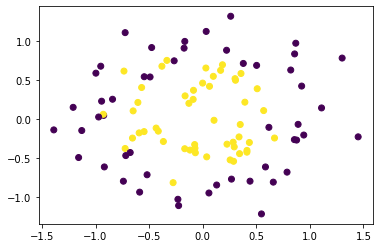

In [28]:
plt.scatter(x[:, 0], x[:, 1], c = y)

In [11]:
from sklearn.model_selection import train_test_split

In [29]:
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

In [31]:
knn.fit(x_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [32]:
knn_pred = knn.predict(x_test)

In [15]:
knn_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1])

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[11  3]
 [ 4 12]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.80      0.75      0.77        16

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



In [34]:
from sklearn.svm import SVC

In [39]:
from sklearn.model_selection import cross_val_score

In [35]:
model = SVC()

In [ ]:
for ker_type in ['linear', 'rbf', 'poly', 'sigmoid']:
    model = SVC(gamma = 'auto', kernel = ker_type )
    svm_score = cross_val_score(model, x, y, scoring='accuracy', cv=3).mean()
    print(svm_score, ker_type)

In [45]:
import numpy as np

No handles with labels found to put in legend.


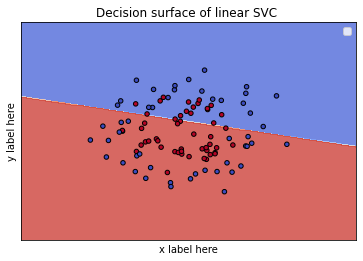

No handles with labels found to put in legend.


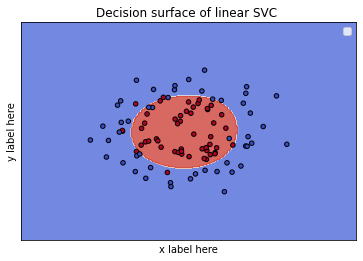

No handles with labels found to put in legend.


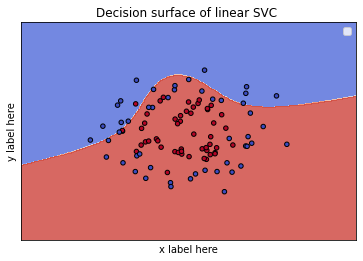

No handles with labels found to put in legend.


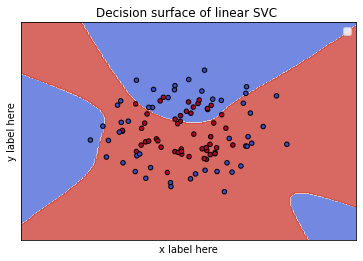

In [46]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#model = SVC(kernel='rbf')
#clf = model.fit(X, y)
for kernel_type in ['linear', 'rbf', 'poly', 'sigmoid']:
    clf_model = SVC(gamma='auto',kernel=kernel_type)
    svm_cv_score = cross_val_score(clf_model, x, y, scoring="accuracy", cv=3).mean()
    model = SVC(kernel=kernel_type)
    clf = model.fit(x, y)
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of linear SVC ')
    # Set-up grid for plotting.
    X0, X1 = x[:, 0], x[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y label here')
    ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

In [36]:
model.fit(x_tr, y_tr)

SVC()

In [37]:
svc_pred = model.predict(x_test)

In [38]:
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

[[13  1]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

